# SEGMENTATION with YOLOv11

##Install the library and download the data sets

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X8usTSmbfyGyRfBAjcmY")
project = rf.workspace("data-for-project-1").project("brain-tumor-yzzav-wwbbs")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 3700/3700 [00:00<00:00, 5723.38it/s]


In [3]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 16.0 MB/s eta 0:00:00


## Importing models

In [4]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11s-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11s-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11s-seg.yaml").load("yolo11s.pt")  # build from YAML and transfer weights


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 166MB/s]


100%|██████████| 18.4M/18.4M [00:00<00:00, 155MB/s]


Transferred 499/561 items from pretrained weights


## Training the model

In [5]:
model.train(data="/content/BRAIN-TUMOR-1/data.yaml", epochs=20, imgsz=640)

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.yaml, data=/content/BRAIN-TUMOR-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11s.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]


AMP: checks passed ✅


train: Scanning /content/BRAIN-TUMOR-1/train/labels... 1593 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1593/1593 [00:01<00:00, 1174.76it/s]

train: New cache created: /content/BRAIN-TUMOR-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/BRAIN-TUMOR-1/valid/labels... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1044.79it/s]

val: New cache created: /content/BRAIN-TUMOR-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.43G      1.112      2.993      2.606      1.313         19        640: 100%|██████████| 100/100 [00:20<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        123        126      0.725      0.731      0.806      0.553      0.716      0.721      0.785      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.28G      1.173      2.021      1.111      1.314         18        640: 100%|██████████| 100/100 [00:15<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]


                   all        123        126      0.662      0.722      0.743      0.436      0.584      0.611      0.603      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.39G      1.214      1.976      1.058      1.327         16        640: 100%|██████████| 100/100 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        123        126      0.434      0.687      0.497      0.296      0.528      0.532      0.486      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.33G      1.159      1.902     0.9455      1.302         15        640: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        123        126      0.686      0.607      0.678      0.441      0.739      0.561      0.666      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.29G       1.13       1.81     0.9325      1.284         19        640: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


                   all        123        126      0.909      0.865      0.944      0.666      0.919      0.865      0.937      0.643

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.31G      1.059      1.772     0.8291      1.226         16        640: 100%|██████████| 100/100 [00:15<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        123        126      0.966      0.944      0.968      0.736      0.966      0.944      0.968      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20       5.3G      1.034      1.678     0.7783      1.223         16        640: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        123        126      0.896      0.686      0.812      0.566      0.896      0.686      0.812      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.35G      0.991       1.62     0.7423      1.197         16        640: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        123        126      0.946      0.982       0.99      0.753      0.946      0.982       0.99      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.27G     0.9875      1.668     0.7186      1.188         17        640: 100%|██████████| 100/100 [00:15<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        123        126      0.984       0.96      0.991      0.743      0.984       0.96      0.991      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.34G     0.9484       1.59     0.6929      1.175         16        640: 100%|██████████| 100/100 [00:15<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        123        126      0.959       0.96      0.979      0.729      0.959       0.96      0.979      0.738


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.28G     0.8748      1.428     0.5372      1.157          9        640: 100%|██████████| 100/100 [00:16<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


                   all        123        126      0.922      0.944      0.971       0.73      0.922      0.944      0.971      0.726

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.28G     0.8305       1.34     0.4914      1.122          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        123        126      0.945      0.929      0.973      0.725      0.945      0.929      0.973      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.28G     0.7951      1.306     0.4553      1.114          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        123        126      0.975      0.968      0.988      0.769      0.975      0.968      0.987      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.28G     0.8045      1.306     0.4432      1.116          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        123        126      0.964      0.968      0.991      0.785      0.964      0.968      0.991      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.28G     0.7733      1.239     0.4111      1.091          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


                   all        123        126      0.984      0.984      0.993      0.779      0.984      0.984      0.993      0.786

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.28G     0.7349      1.197     0.3939      1.072          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        123        126      0.981      0.992      0.991      0.787      0.981      0.992      0.991      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.28G     0.7184      1.185      0.384      1.054          8        640: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        123        126      0.983      0.984      0.991      0.805      0.983      0.984      0.991      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.28G     0.6972      1.146     0.3577       1.04          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        123        126      0.975      0.992      0.993      0.798      0.975      0.992      0.993      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.28G     0.6782      1.127     0.3383      1.033          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        123        126      0.984      0.992      0.993      0.823      0.984      0.992      0.993       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.28G      0.651      1.105     0.3292       1.01          9        640: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        123        126      0.984      0.991      0.994      0.817      0.984      0.991      0.994      0.816



20 epochs completed in 0.100 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


                   all        123        126      0.984      0.992      0.994      0.815      0.984      0.992      0.994      0.815
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7907ea896d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [10]:
model=YOLO("/content/runs/segment/train/weights/best.pt")


In [15]:
results = model.predict(source="/content/test images",save=True,save_dir="/content/runs/predict")


image 1/5 /content/test images/1.jpeg: 640x640 1 tumor, 15.4ms
image 2/5 /content/test images/2.jpeg: 640x640 1 tumor, 11.5ms
image 3/5 /content/test images/3.jpeg: 640x640 1 tumor, 11.4ms
image 4/5 /content/test images/4.jpeg: 320x640 2 tumors, 12.2ms
image 5/5 /content/test images/5.jpeg: 640x608 1 tumor, 77.6ms
Speed: 2.6ms preprocess, 25.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/segment/predict


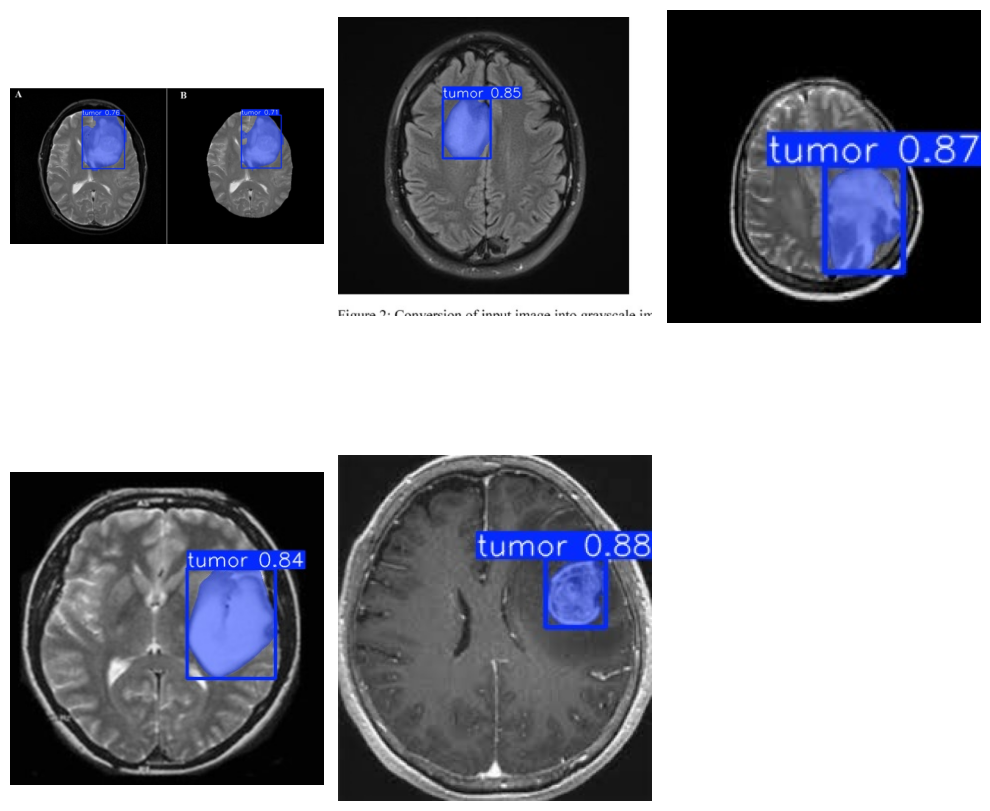

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

result_image_path = "/content/runs/segment/predict"
result_images = []

for file_name in os.listdir(result_image_path):
  if file_name.lower().endswith(("jpg", "jpeg", "png")):
    result_images.append(os.path.join(result_image_path, file_name))

plt.figure(figsize=(10, 10))

# Görselleri göstermek
for idx, image_path in enumerate(result_images):
  image = mpimg.imread(image_path)
  plt.subplot(2, 3, idx + 1)
  plt.imshow(image)
  plt.axis("off")

plt.tight_layout()
plt.show()
